# **Investment Strategies**

### **Data Viz**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ibov = pd.read_csv('BVSP.csv', parse_dates=['Date'], index_col='Date')
ibov

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400
2010-01-05,70046.0,70595.0,69928.0,70240.0,70240.0,1984200
2010-01-06,70237.0,70937.0,70016.0,70729.0,70729.0,2243600
2010-01-07,70723.0,70723.0,70045.0,70451.0,70451.0,1555000
2010-01-08,70455.0,70766.0,70158.0,70263.0,70263.0,1634400
...,...,...,...,...,...,...
2023-01-20,112922.0,113025.0,111735.0,112301.0,112301.0,15436600
2023-01-23,112041.0,113061.0,111542.0,111709.0,111709.0,13701000
2023-01-24,111746.0,113040.0,111669.0,113028.0,113028.0,11551500


In [3]:
# We are only interested in the 'close' prices

df = ibov['Close'].to_frame()
df

,Close
Date,
2010-01-04,70045.0
2010-01-05,70240.0
2010-01-06,70729.0
2010-01-07,70451.0
2010-01-08,70263.0
...,...
2023-01-20,112301.0
2023-01-23,111709.0
2023-01-24,113028.0


In [4]:
df.describe()

,Close
count,3235.000000
mean,75087.620402
std,23836.812562
min,37497.000000
25%,55552.500000
50%,66407.000000
75%,97816.000000
max,130776.000000


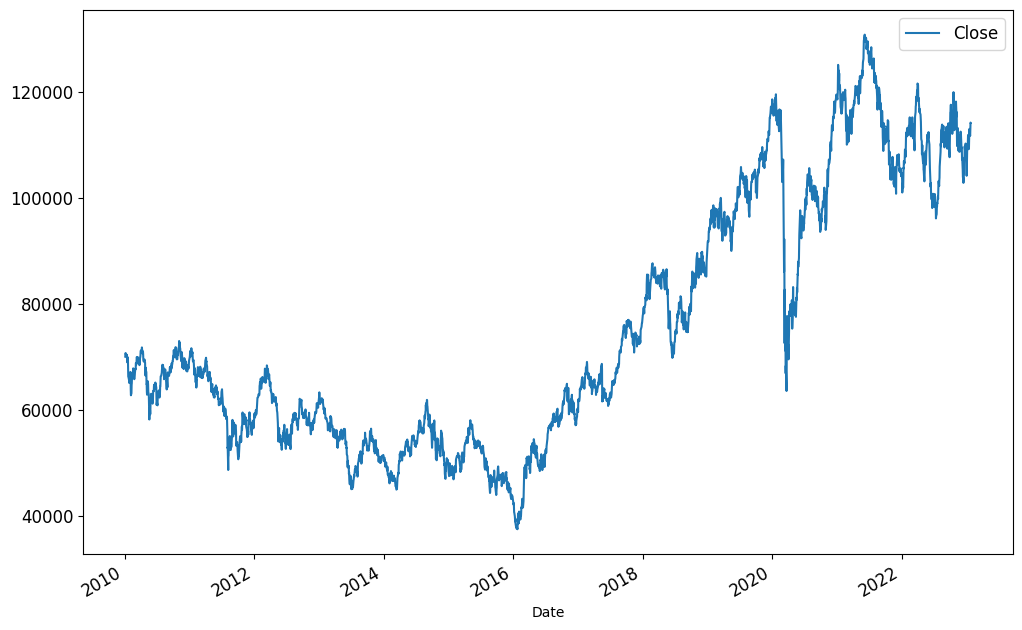

In [5]:
df.plot(figsize=(12,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [6]:
df['Return'] = df.pct_change()
df

,Close,Return
Date,,
2010-01-04,70045.0,NaN
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
...,...,...
2023-01-20,112301.0,-0.006239
2023-01-23,111709.0,-0.005272
2023-01-24,113028.0,0.011807


In [7]:
df.isna().sum()

Close     0
Return    1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.rename(columns={'Close': 'Ibov_Close', 'Return': 'Ibov_Return'}, inplace=True)

In [10]:
df

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2023-01-20,112301.0,-0.006239
2023-01-23,111709.0,-0.005272
2023-01-24,113028.0,0.011807


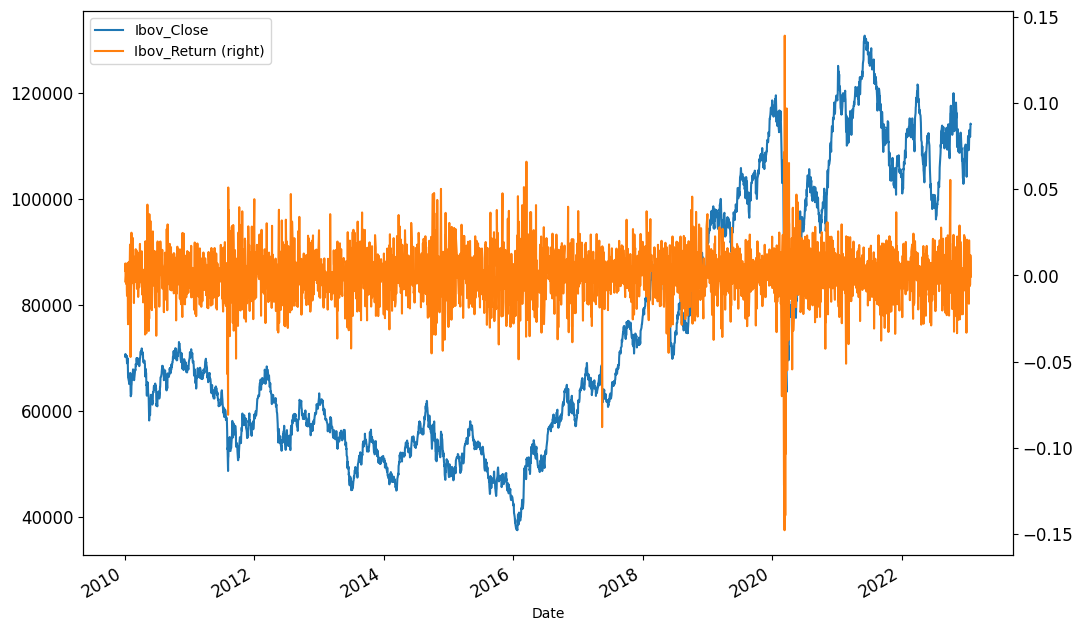

In [11]:
df.plot(figsize=(12,8), secondary_y= 'Ibov_Return', mark_right=True, fontsize=12)
plt.show()

The big spikes in Ibov_Return was caused by the pandemic.

## **Simple Momentum Strategy**

__Positions__:

+1: Investing in Ibov (__long__ position) <br>
-1: Short Selling Ibov (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

__Buy and Hold__ (Basic Strategy - passive): Initially Investing into Ibov and do nothing (Position: +1 on any given day)

__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into Ibov tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ Ibov tomorrow if today´s return was __negative__

__We gonna choose the period after the 2008 financial crisis and the Covid-19 pandemic for this strategy.__

In [12]:
df1 = df.loc['2010-01-01': '2019-12-31', 'Ibov_Close': 'Ibov_Return']

In [13]:
df1

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2019-12-20,115121.0,-0.000087
2019-12-23,115863.0,0.006445
2019-12-26,117203.0,0.011565


In [14]:
# Positions based on the signs of the 'Ibov_Return'

df1['Position'] = np.sign(df1['Ibov_Return'])

In [15]:
df1

,Ibov_Close,Ibov_Return,Position
Date,,,
2010-01-05,70240.0,0.002784,1.0
2010-01-06,70729.0,0.006962,1.0
2010-01-07,70451.0,-0.003930,-1.0
2010-01-08,70263.0,-0.002669,-1.0
2010-01-11,70433.0,0.002419,1.0
...,...,...,...
2019-12-20,115121.0,-0.000087,-1.0
2019-12-23,115863.0,0.006445,1.0
2019-12-26,117203.0,0.011565,1.0


In [16]:
# Considering that if the index drops we sell the stock the next day and that if the index rises we invest in more stocks,
# we will create a column that evaluates how much return we will have with this strategy

df1['Strategy_Return'] = df1['Position'].shift() * df1['Ibov_Return']

In [17]:
df1

,Ibov_Close,Ibov_Return,Position,Strategy_Return
Date,,,,
2010-01-05,70240.0,0.002784,1.0,NaN
2010-01-06,70729.0,0.006962,1.0,0.006962
2010-01-07,70451.0,-0.003930,-1.0,-0.003930
2010-01-08,70263.0,-0.002669,-1.0,0.002669
2010-01-11,70433.0,0.002419,1.0,-0.002419
...,...,...,...,...
2019-12-20,115121.0,-0.000087,-1.0,-0.000087
2019-12-23,115863.0,0.006445,1.0,-0.006445
2019-12-26,117203.0,0.011565,1.0,0.011565


In [18]:
df1.Strategy_Return.add(1, fill_value=0).cumprod()

Date
2010-01-05    1.000000
2010-01-06    1.006962
2010-01-07    1.003004
2010-01-08    1.005681
2010-01-11    1.003247
                ...   
2019-12-20    0.961029
2019-12-23    0.954835
2019-12-26    0.965878
2019-12-27    0.960364
2019-12-30    0.965062
Name: Strategy_Return, Length: 2470, dtype: float64

In [19]:
# Evaluating the prices of Ibov with the returns of our strategy
# In Finance cumprod() is helpful to calculate the Value of Investments over time given the returns

df1['Strategy'] = df1.Strategy_Return.add(1, fill_value=0).cumprod() * df1.iloc[0,0]

In [20]:
df1

,Ibov_Close,Ibov_Return,Position,Strategy_Return,Strategy
Date,,,,,
2010-01-05,70240.0,0.002784,1.0,NaN,70240.000000
2010-01-06,70729.0,0.006962,1.0,0.006962,70729.000000
2010-01-07,70451.0,-0.003930,-1.0,-0.003930,70451.000000
2010-01-08,70263.0,-0.002669,-1.0,0.002669,70639.000000
2010-01-11,70433.0,0.002419,1.0,-0.002419,70468.090275
...,...,...,...,...,...
2019-12-20,115121.0,-0.000087,-1.0,-0.000087,67502.666473
2019-12-23,115863.0,0.006445,1.0,-0.006445,67067.585310
2019-12-26,117203.0,0.011565,1.0,0.011565,67843.247638


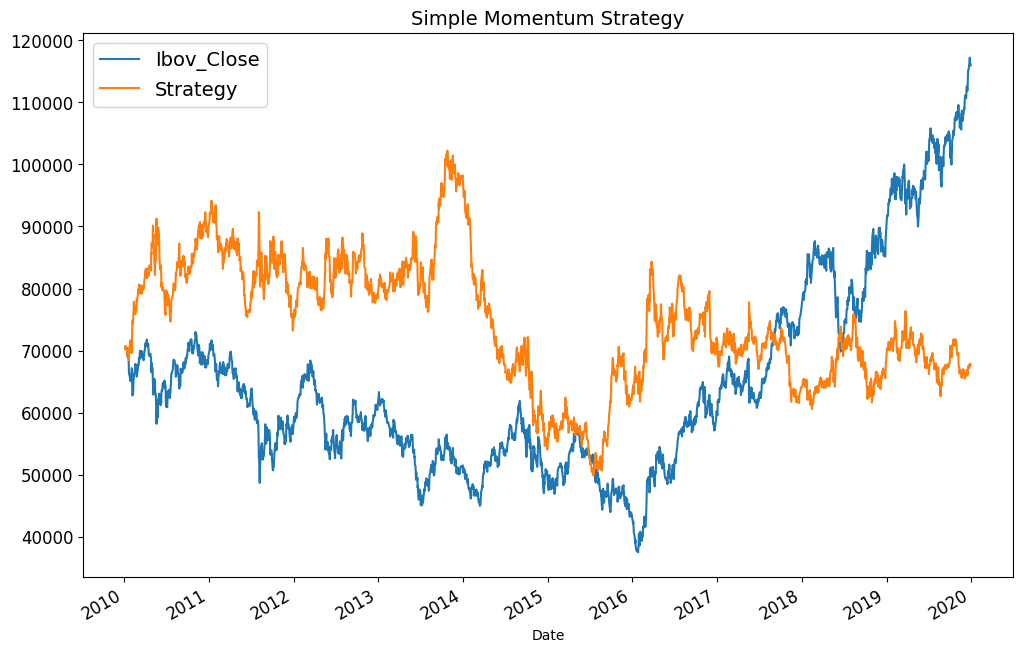

In [21]:
df1[['Ibov_Close', 'Strategy']].plot(figsize = (12,8), fontsize = 12)
plt.title('Simple Momentum Strategy', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

This graph we can observe that initially our strategy works but in the long run our strategy is underperforming.

In [22]:
# Evaluating the risk and return for both strategies

def rnr(returns):
    summary = returns.agg(['mean', 'std']).T
    summary['Return'] = summary['mean'] * 252 #We have, approximately, 252 trading days in a year
    summary['Risk'] = summary['std'] * np.sqrt(252)
    summary.drop(columns=['mean', 'std'], inplace=True)
    return summary

In [23]:
rnr(df1[['Ibov_Return', 'Strategy_Return']])

,Return,Risk
Ibov_Return,0.076378,0.223283
Strategy_Return,0.021261,0.223286


The risk is almost the same but our return clearly underperforms the Ibovespa index.

## **Simple Contrarian Strategy**

__Strategies__:

__Buy and Hold__ (Basic Strategy): Initially Investing into Ibov and do nothing (Position: +1 on all days)

__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ Ibov tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into Ibov tomorrow if today´s return was __negative__

__Again, we gonna choose the period after the 2008 financial crisis and the Covid-19 pandemic for this strategy.__

In [24]:
df2 = df.loc['2010-01-01': '2019-12-31', 'Ibov_Close': 'Ibov_Return']
df2

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2019-12-20,115121.0,-0.000087
2019-12-23,115863.0,0.006445
2019-12-26,117203.0,0.011565


In [25]:
# Now, in this strategy we invert the position that we have before


df2['Position'] = -np.sign(df1['Ibov_Return'])
df2

,Ibov_Close,Ibov_Return,Position
Date,,,
2010-01-05,70240.0,0.002784,-1.0
2010-01-06,70729.0,0.006962,-1.0
2010-01-07,70451.0,-0.003930,1.0
2010-01-08,70263.0,-0.002669,1.0
2010-01-11,70433.0,0.002419,-1.0
...,...,...,...
2019-12-20,115121.0,-0.000087,1.0
2019-12-23,115863.0,0.006445,-1.0
2019-12-26,117203.0,0.011565,-1.0


In [26]:
df2['Strategy_Return'] = df2['Position'].shift() * df2['Ibov_Return']
df2['Strategy'] = df2.Strategy_Return.add(1, fill_value=0).cumprod() * df2.iloc[0,0]
df2

,Ibov_Close,Ibov_Return,Position,Strategy_Return,Strategy
Date,,,,,
2010-01-05,70240.0,0.002784,-1.0,NaN,70240.000000
2010-01-06,70729.0,0.006962,-1.0,-0.006962,69751.000000
2010-01-07,70451.0,-0.003930,1.0,0.003930,70025.155976
2010-01-08,70263.0,-0.002669,1.0,-0.002669,69838.292350
2010-01-11,70433.0,0.002419,-1.0,0.002419,70007.264777
...,...,...,...,...,...
2019-12-20,115121.0,-0.000087,1.0,0.000087,44852.309644
2019-12-23,115863.0,0.006445,-1.0,0.006445,45141.400373
2019-12-26,117203.0,0.011565,-1.0,-0.011565,44619.322777


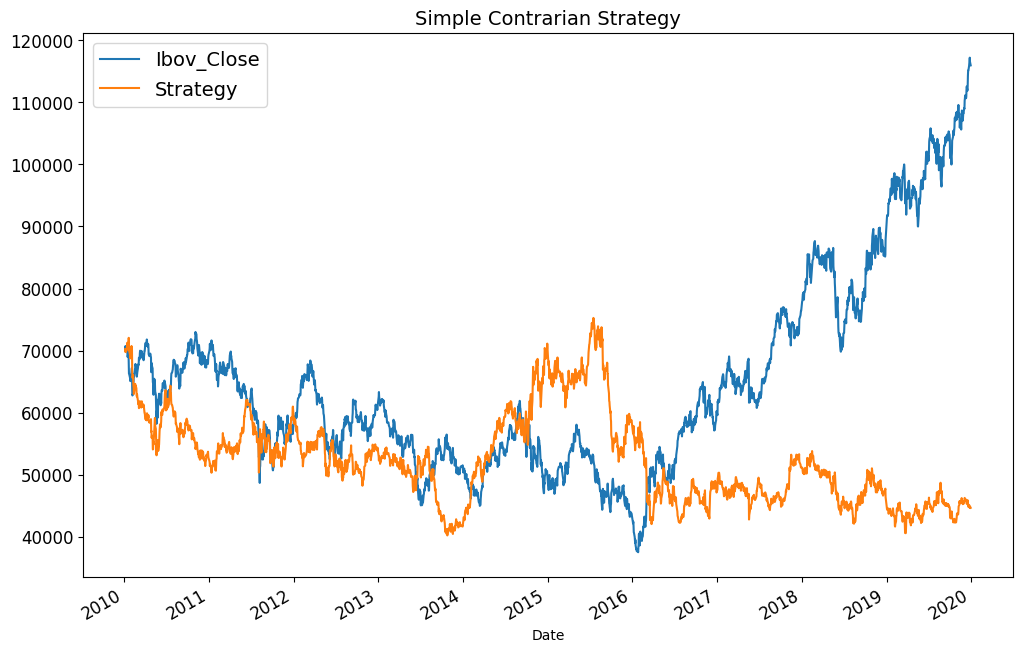

In [27]:
df2[['Ibov_Close', 'Strategy']].plot(figsize = (12,8), fontsize = 12)
plt.title('Simple Contrarian Strategy', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

This strategy had short period of profit and longer period underperforming.

In [28]:
rnr(df2[['Ibov_Return', 'Strategy_Return']])

,Return,Risk
Ibov_Return,0.076378,0.223283
Strategy_Return,-0.021261,0.223286


Again, this strategy isn't profitable so better look for more complex strategies.

## **Complex Strategies & Backtesting**

### __Things to consider:__

Even if a Strategy __seems to outperform__ the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting -> Was the Strategy __fitted__ and optimized on __historical data__? __Forward Testing__ is required!<br>
- __Transaction Costs__ -> Changing Positions trigger Cost. Include Costs!<br>
- __Tax effects__ -> Changing Positions can trigger (earlier) Tax Payments. Include Taxes!

In [29]:
df3 = df.loc['2010-01-01': '2019-12-31', 'Ibov_Close': 'Ibov_Return']
df3

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2019-12-20,115121.0,-0.000087
2019-12-23,115863.0,0.006445
2019-12-26,117203.0,0.011565


In [30]:
# Here we can change the parameters to overfit the returns, e.g.:
# df3['DJI_Return'] > 0.01 (only changing the position when we have a return above of 1%)

df3['Position'] = np.where(df3['Ibov_Return'] > 0.01, -1, 1)

In [31]:
df3

,Ibov_Close,Ibov_Return,Position
Date,,,
2010-01-05,70240.0,0.002784,1
2010-01-06,70729.0,0.006962,1
2010-01-07,70451.0,-0.003930,1
2010-01-08,70263.0,-0.002669,1
2010-01-11,70433.0,0.002419,1
...,...,...,...
2019-12-20,115121.0,-0.000087,1
2019-12-23,115863.0,0.006445,1
2019-12-26,117203.0,0.011565,-1


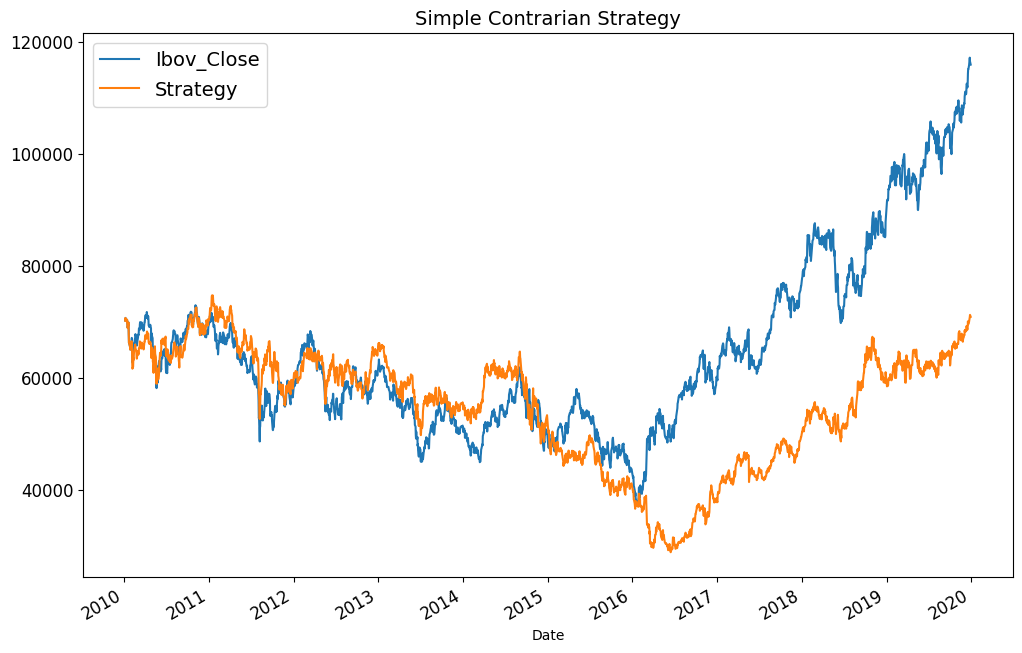

                   Return      Risk
Ibov_Return      0.076378  0.223283
Strategy_Return  0.025993  0.223372


In [32]:
df3['Strategy_Return'] = df3['Position'].shift() * df3['Ibov_Return']

df3['Strategy'] = df3.Strategy_Return.add(1, fill_value=0).cumprod() * df3.iloc[0,0]

df3[['Ibov_Close', 'Strategy']].plot(figsize = (12,8), fontsize = 12)
plt.title('Simple Contrarian Strategy', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

print(rnr(df3[['Ibov_Return', 'Strategy_Return']]))

Now our strategy is giving us a better return but yet is underperforming.

## **Simple Moving Averages (SMA)**

__Strategies__:

__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: SMA50 __>__ SMA200 <br>
__b) Short Selling (-1)__: SMA50 __<__ SMA200

In [33]:
df4 = df.loc['2010-01-01': '2019-12-31', 'Ibov_Close': 'Ibov_Return']
df4

,Ibov_Close,Ibov_Return
Date,,
2010-01-05,70240.0,0.002784
2010-01-06,70729.0,0.006962
2010-01-07,70451.0,-0.003930
2010-01-08,70263.0,-0.002669
2010-01-11,70433.0,0.002419
...,...,...
2019-12-20,115121.0,-0.000087
2019-12-23,115863.0,0.006445
2019-12-26,117203.0,0.011565


In [34]:
# Calculating the moving average
# Moving averages are commonly used with time series to smooth out short-term fluctuations and highlight longer-term trends.

df4.Ibov_Close.rolling(window=50).mean()

Date
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
2010-01-11          NaN
                ...    
2019-12-20    108378.66
2019-12-23    108659.58
2019-12-26    108927.00
2019-12-27    109171.64
2019-12-30    109401.12
Name: Ibov_Close, Length: 2470, dtype: float64

In [35]:
df4['SMA50'] = df4.Ibov_Close.rolling(window=50).mean()
df4

,Ibov_Close,Ibov_Return,SMA50
Date,,,
2010-01-05,70240.0,0.002784,NaN
2010-01-06,70729.0,0.006962,NaN
2010-01-07,70451.0,-0.003930,NaN
2010-01-08,70263.0,-0.002669,NaN
2010-01-11,70433.0,0.002419,NaN
...,...,...,...
2019-12-20,115121.0,-0.000087,108378.66
2019-12-23,115863.0,0.006445,108659.58
2019-12-26,117203.0,0.011565,108927.00


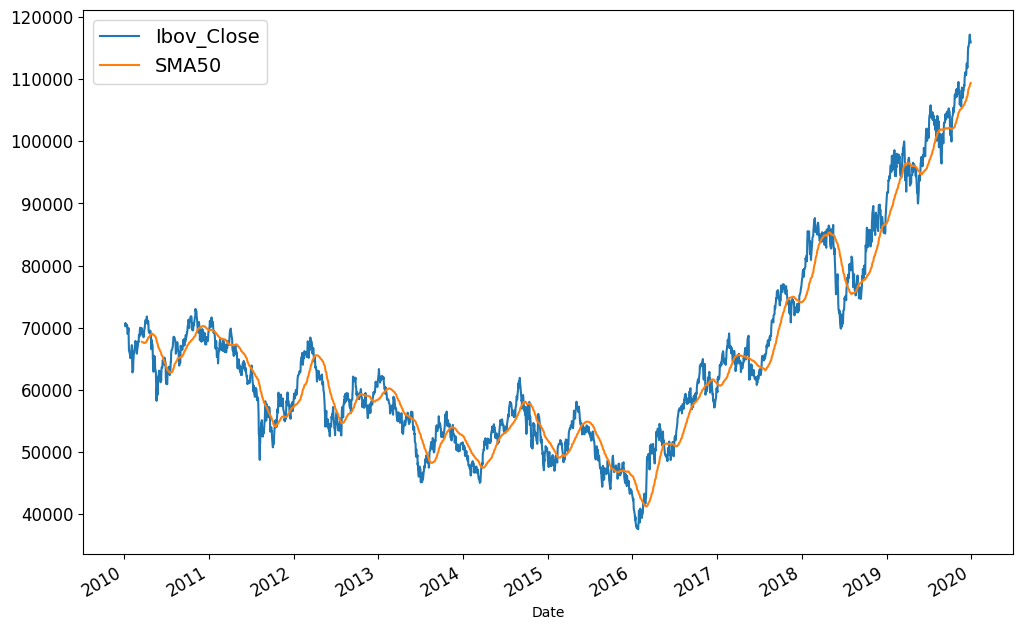

In [36]:
df4[['Ibov_Close', 'SMA50']].plot(figsize = (12,8), fontsize = 12)
plt.legend(fontsize = 14)
plt.show()

In [37]:
df4['SMA200'] = df4.Ibov_Close.rolling(window=200).mean()
df4

,Ibov_Close,Ibov_Return,SMA50,SMA200
Date,,,,
2010-01-05,70240.0,0.002784,NaN,NaN
2010-01-06,70729.0,0.006962,NaN,NaN
2010-01-07,70451.0,-0.003930,NaN,NaN
2010-01-08,70263.0,-0.002669,NaN,NaN
2010-01-11,70433.0,0.002419,NaN,NaN
...,...,...,...,...
2019-12-20,115121.0,-0.000087,108378.66,101478.94
2019-12-23,115863.0,0.006445,108659.58,101581.43
2019-12-26,117203.0,0.011565,108927.00,101677.31


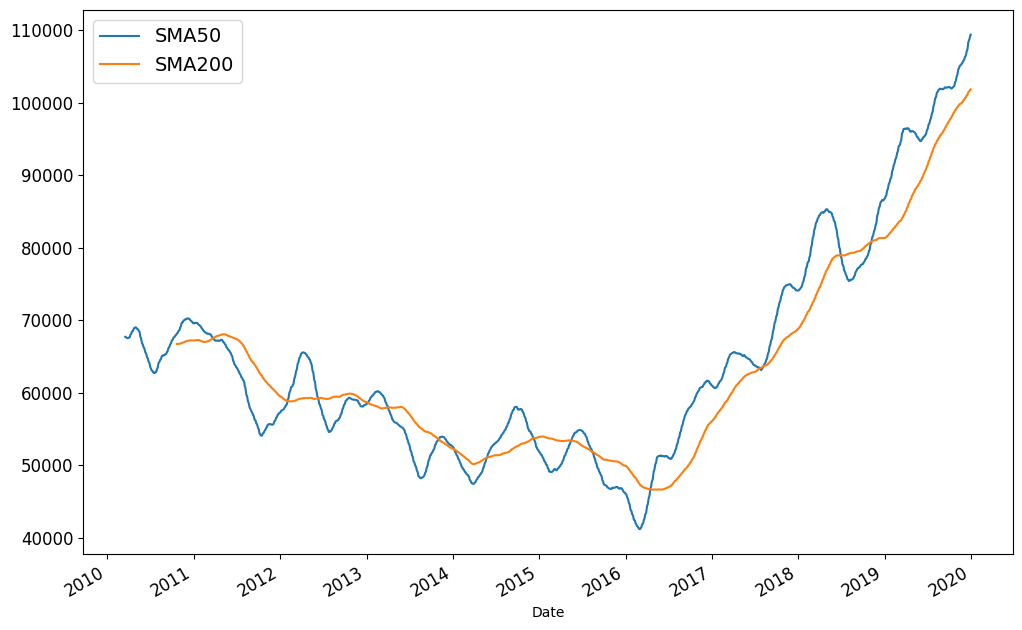

In [38]:
df4[['SMA50', 'SMA200']].plot(figsize = (12,8), fontsize = 12)
plt.legend(fontsize = 14)
plt.show()

1) SMA50 better captures price change and trends.
2) In this plot we could see the moving averages cross overs. 

__Note:__ A moving average crossover is a trading strategy that involves comparing two different moving averages of an asset's price to identify a potential buy or sell signal. A "buy" signal is generated when a short-term moving average (such as a 50-day moving average) crosses above a longer-term moving average (such as a 200-day moving average). Conversely, a "sell" signal is generated when the short-term moving average crosses below the long-term moving average.

Moving average crossovers are popular among traders because they can help identify trends in the asset's price and are relatively easy to interpret. However, it's worth noting that moving averages are lagging indicators, meaning they are based on past prices and may not always accurately predict future price movements. As a result, traders often use moving average crossovers in conjunction with other technical indicators and analysis to make more informed trading decisions.

In [39]:
df4.dropna(inplace=True)

In [40]:
df4

,Ibov_Close,Ibov_Return,SMA50,SMA200
Date,,,,
2010-10-22,69530.0,-0.001752,68133.30,66718.940
2010-10-25,69580.0,0.000719,68205.58,66715.640
2010-10-26,70740.0,0.016671,68295.10,66715.695
2010-10-27,70569.0,-0.002417,68372.44,66716.285
2010-10-28,70320.0,-0.003528,68427.16,66716.570
...,...,...,...,...
2019-12-20,115121.0,-0.000087,108378.66,101478.940
2019-12-23,115863.0,0.006445,108659.58,101581.430
2019-12-26,117203.0,0.011565,108927.00,101677.310


In [41]:
df4['Position'] = np.sign(df4.SMA50.sub(df4.SMA200))
df4

,Ibov_Close,Ibov_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-22,69530.0,-0.001752,68133.30,66718.940,1.0
2010-10-25,69580.0,0.000719,68205.58,66715.640,1.0
2010-10-26,70740.0,0.016671,68295.10,66715.695,1.0
2010-10-27,70569.0,-0.002417,68372.44,66716.285,1.0
2010-10-28,70320.0,-0.003528,68427.16,66716.570,1.0
...,...,...,...,...,...
2019-12-20,115121.0,-0.000087,108378.66,101478.940,1.0
2019-12-23,115863.0,0.006445,108659.58,101581.430,1.0
2019-12-26,117203.0,0.011565,108927.00,101677.310,1.0


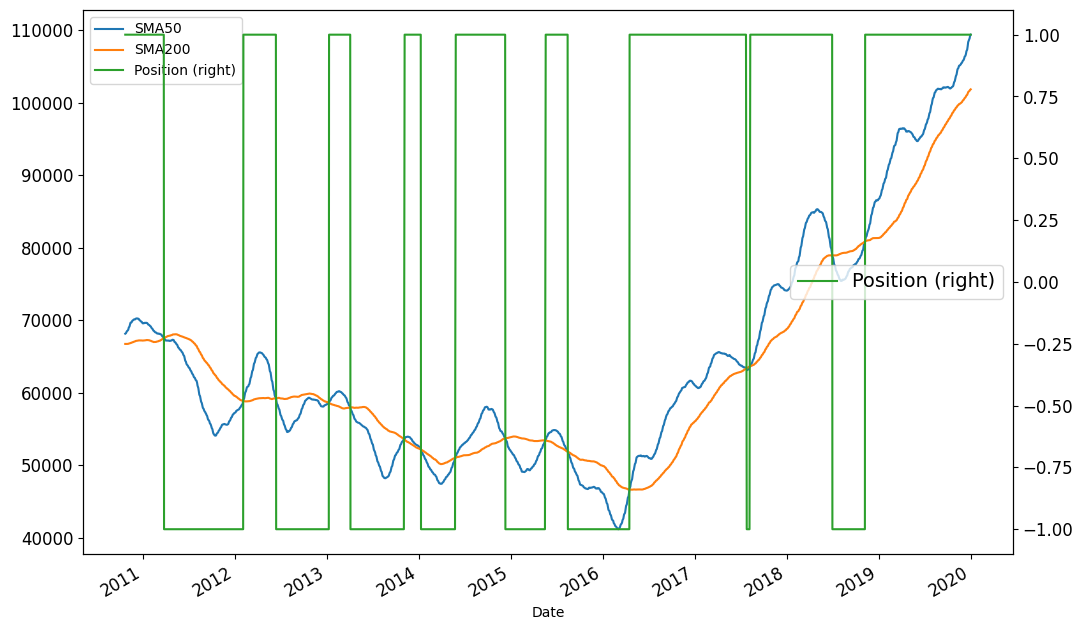

In [42]:
df4[['SMA50', 'SMA200', 'Position']].plot(figsize = (12,8), fontsize = 12, secondary_y='Position')
plt.legend(fontsize = 14)
plt.show()

Graph showing the changing in position based on our SMA strategy.

In [43]:
df4['Strategy_Return'] = df4['Position'].shift() * df4['Ibov_Return']

In [44]:
df4['Strategy'] = df4.Strategy_Return.add(1, fill_value=0).cumprod() * df4.iloc[0,0]

In [45]:
df4

,Ibov_Close,Ibov_Return,SMA50,SMA200,Position,Strategy_Return,Strategy
Date,,,,,,,
2010-10-22,69530.0,-0.001752,68133.30,66718.940,1.0,NaN,69530.000000
2010-10-25,69580.0,0.000719,68205.58,66715.640,1.0,0.000719,69580.000000
2010-10-26,70740.0,0.016671,68295.10,66715.695,1.0,0.016671,70740.000000
2010-10-27,70569.0,-0.002417,68372.44,66716.285,1.0,-0.002417,70569.000000
2010-10-28,70320.0,-0.003528,68427.16,66716.570,1.0,-0.003528,70320.000000
...,...,...,...,...,...,...,...
2019-12-20,115121.0,-0.000087,108378.66,101478.940,1.0,-0.000087,29833.287059
2019-12-23,115863.0,0.006445,108659.58,101581.430,1.0,0.006445,30025.574296
2019-12-26,117203.0,0.011565,108927.00,101677.310,1.0,0.011565,30372.831570


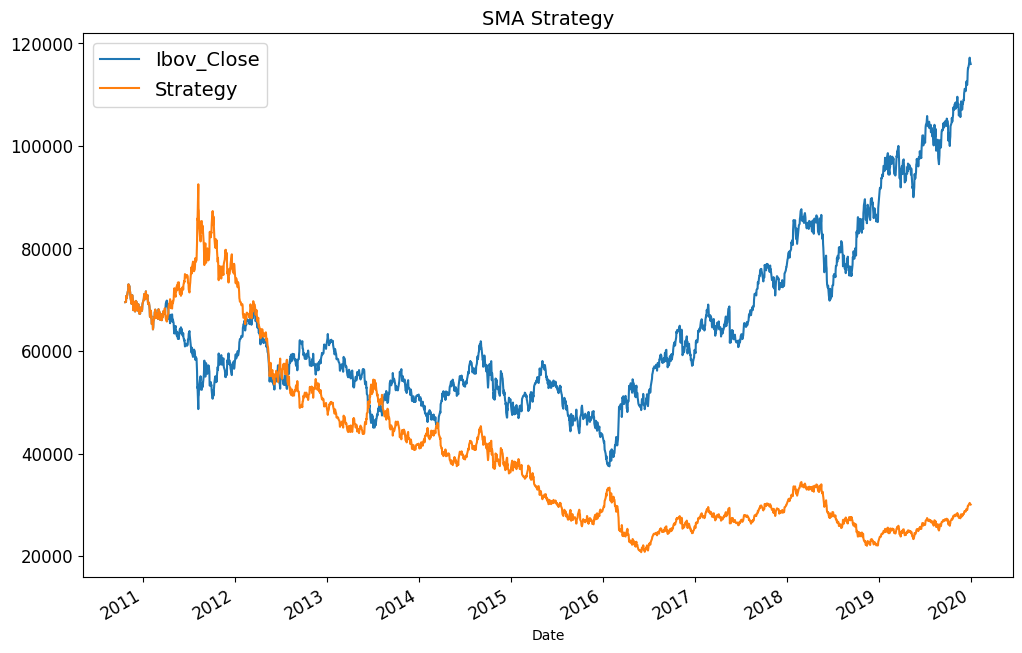

                   Return      Risk
Ibov_Return      0.081779  0.224497
Strategy_Return -0.067847  0.224564


In [46]:
df4[['Ibov_Close', 'Strategy']].plot(figsize = (12,8), fontsize = 12)
plt.title('SMA Strategy', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

print(rnr(df4[['Ibov_Return', 'Strategy_Return']]))

We can conclude that SMA isn't a good strategy in this period too.